In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#getting the dataset

df = pd.read_csv('cust_churn.csv')

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


##  Split Data

In [29]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)
print(len(df_train), len(df_test))

5634 1409


##  Preprocessing


In [30]:
df_train.TotalCharges = df_train['TotalCharges'].replace(' ', '0', regex=True)
df_train.TotalCharges = pd.to_numeric(df_train.TotalCharges)

df_test.TotalCharges = df_test['TotalCharges'].replace(' ', '0', regex=True)
df_test.TotalCharges = pd.to_numeric(df_test.TotalCharges)

In [31]:
df_train['Churn'] = df_train['Churn'].map({'Yes':1, 'No':0})
df_test['Churn'] = df_test['Churn'].map({'Yes':1, 'No':0})

## EDA

Percentage of positive churn outcome: 0.26641817536386225


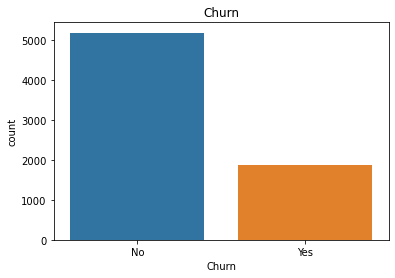

In [34]:
print(f"Percentage of positive churn outcome: {df_train['Churn'].sum()/len(df_train)}")

sn.countplot(x=df['Churn'])
plt.title('Churn')
plt.show()

In [35]:
#demographic info

demo_features = ['gender','SeniorCitizen','Partner','Dependents']

for feature in demo_features:
    cross_table = df_train[[feature,'Churn']].groupby([feature], as_index=False).mean().sort_values(by='Churn', ascending=False)
    display(cross_table)

,gender,Churn
0,Female,0.272985
1,Male,0.259851


,SeniorCitizen,Churn
1,1,0.418401
0,0,0.237026


,Partner,Churn
0,No,0.330581
1,Yes,0.198020


,Dependents,Churn
0,No,0.315016
1,Yes,0.152522


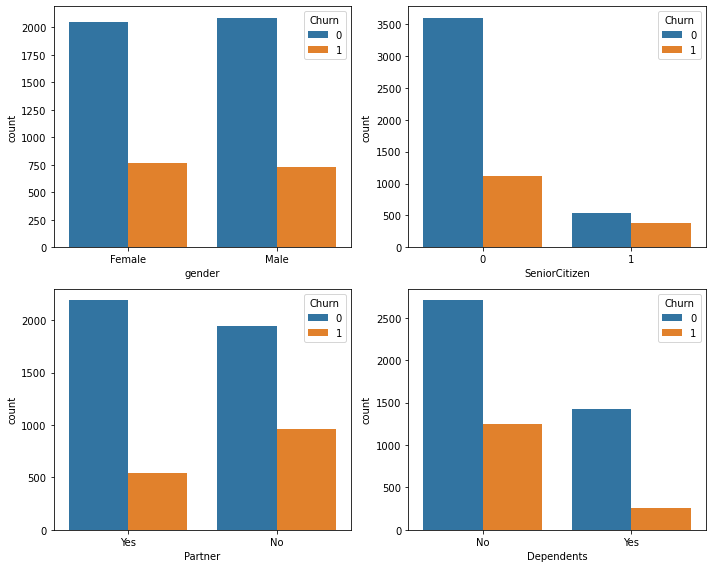

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

sn.countplot(x="gender", hue="Churn", data=df_train, ax=axes[0,0])
sn.countplot(x="SeniorCitizen", hue="Churn", data=df_train, ax=axes[0,1])
sn.countplot(x="Partner", hue="Churn", data=df_train, ax=axes[1,0])
sn.countplot(x="Dependents", hue="Churn", data=df_train, ax=axes[1,1])
        
plt.tight_layout()
plt.show()

In [37]:
#service info

service_features = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for feature in service_features:
    cross_table = df_train[[feature,'Churn']].groupby([feature], as_index=False).mean().sort_values(by='Churn', ascending=False)
    display(cross_table)

,PhoneService,Churn
1,Yes,0.269049
0,No,0.241697


,MultipleLines,Churn
2,Yes,0.289629
0,No,0.251103
1,No phone service,0.241697


,InternetService,Churn
1,Fiber optic,0.419952
0,DSL,0.187435
2,No,0.078560


,OnlineSecurity,Churn
0,No,0.417114
2,Yes,0.148240
1,No internet service,0.078560


,OnlineBackup,Churn
0,No,0.409183
2,Yes,0.203998
1,No internet service,0.078560


,DeviceProtection,Churn
0,No,0.392799
2,Yes,0.223711
1,No internet service,0.078560


,TechSupport,Churn
0,No,0.416488
2,Yes,0.147826
1,No internet service,0.078560


,StreamingTV,Churn
0,No,0.334531
2,Yes,0.302059
1,No internet service,0.078560


,StreamingMovies,Churn
0,No,0.342638
2,Yes,0.293930
1,No internet service,0.078560


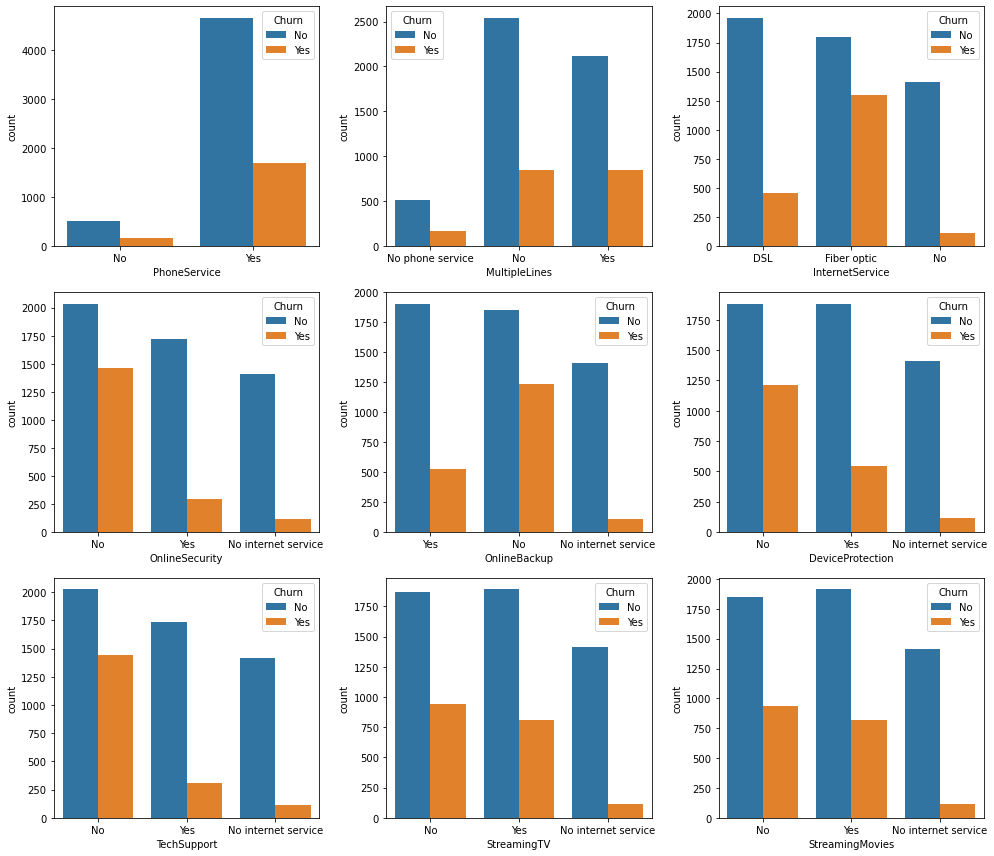

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))

sn.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[0,0])
sn.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[0,1])
sn.countplot(x="InternetService", hue="Churn", data=df, ax=axes[0,2])
sn.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[1,0])
sn.countplot(x="OnlineBackup", hue="Churn", data=df, ax=axes[1,1])
sn.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[1,2])
sn.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[2,0])
sn.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[2,1])
sn.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[2,2])

plt.tight_layout()
plt.show()

In [39]:
#account info

acc_features = ['tenure','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']
cat_acc_features = ['Contract','PaperlessBilling','PaymentMethod']
num_acc_features = ['tenure','MonthlyCharges','TotalCharges']

for feature in cat_acc_features:
    cross_table = df_train[[feature,'Churn']].groupby([feature], as_index=False).mean().sort_values(by='Churn', ascending=False)
    display(cross_table)

,Contract,Churn
0,Month-to-month,0.430774
1,One year,0.102954
2,Two year,0.028443


,PaperlessBilling,Churn
1,Yes,0.335914
0,No,0.163884


,PaymentMethod,Churn
2,Electronic check,0.459916
3,Mailed check,0.195552
0,Bank transfer (automatic),0.162903
1,Credit card (automatic),0.144054


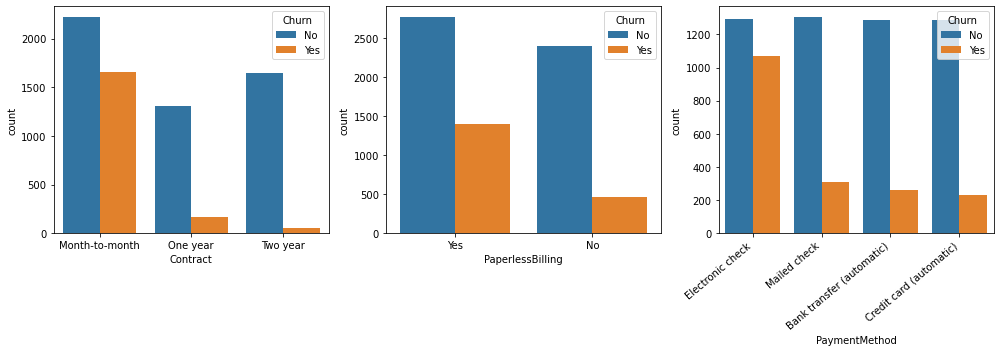

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sn.countplot(x="Contract", hue="Churn", data=df, ax=axes[0])
sn.countplot(x="PaperlessBilling", hue="Churn", data=df, ax=axes[1])
sn.countplot(x="PaymentMethod", hue="Churn", data=df, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

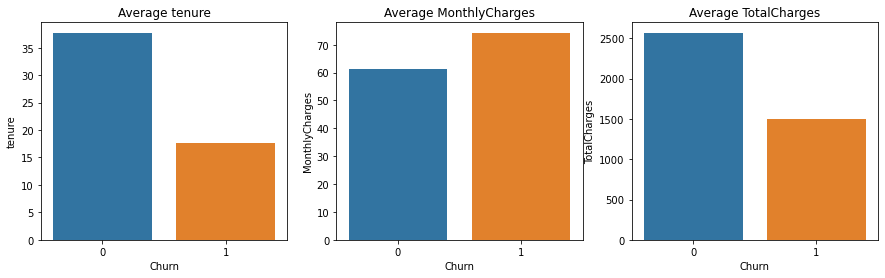

In [41]:
df_churn = df_train.groupby(['Churn'], as_index=False).mean()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
for i in range(3):
    feature = num_acc_features[i]
    sn.barplot(x='Churn',y=feature, data=df_churn, ax=axes[i])
    axes[i].set_title(f"Average {feature}")
    axes[i].set_xlabel(f'Churn')
    axes[i].set_ylabel(f"{feature}")

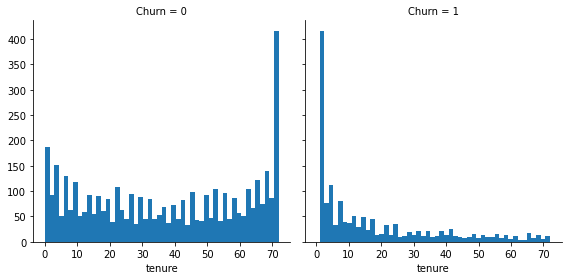

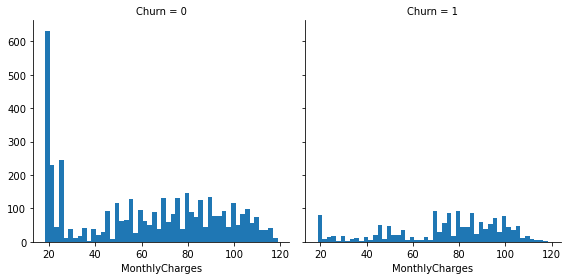

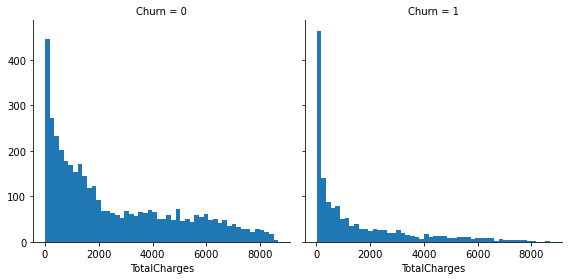

In [42]:
for feature in ['tenure','MonthlyCharges','TotalCharges']:
    g = sn.FacetGrid(df_train, col='Churn', height=4)
    g.map(plt.hist, feature, bins=50)
    plt.show()

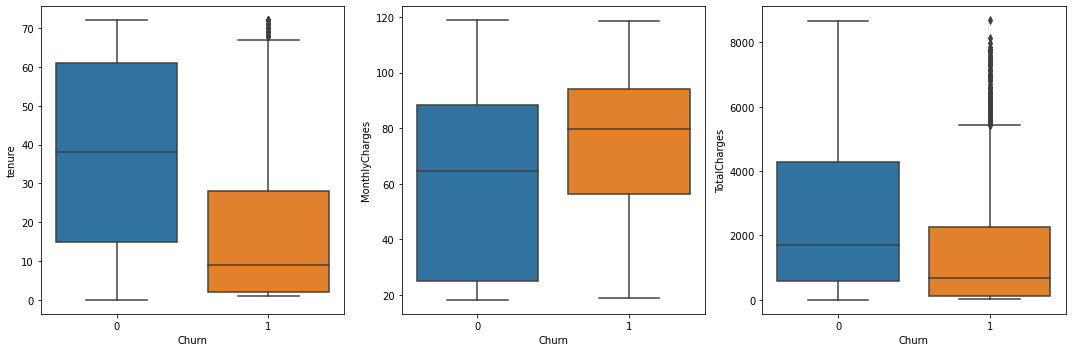

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for i in range(3):
    feature = num_acc_features[i]
    sn.boxplot(data=df_train, x='Churn', y=feature, ax=axes[i])
plt.tight_layout()
plt.show()